# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


Для этого:

* Объедините два массива в DataFrame. 
* Обоснуйте выбор теста на корреляцию. 
* Сделайте вывод по гипотезе.
* Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя
* Обоснуйте выбор теста. 
* Сделайте вывод по гипотезе.

In [1]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import normaltest

In [2]:
petersburg  = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan     = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

In [3]:
#Для соединения таблиц необходимо дозаполнить недостающее значение для petersburg
mean_petersburg = pd.DataFrame(petersburg).mean()[0]
mean_petersburg

0.10344285714285714

In [4]:
#В качестве недостающего элемента возьмем среднее значение, так как разброс данных не большой

data = pd.DataFrame({
    'petersburg':[0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, mean_petersburg],
    'magadan':[0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
})

data

,petersburg,magadan
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


Для выбора теста на коррляцию определим нормальность признаков при alpha = 0.05

In [25]:
alpha = 0.05

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [29]:
#Тест Шапиро-Уилка

_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0);
else:
	print(Ha);

p=0.100
Данные распределены нормально


In [28]:
#Тест Д’Агостино

_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0);
else:
	print(Ha);

p=0.042
Данные распределены нормально


В результате тестов, делаем вывод, что данные распределены нормально.
В связи с этим, корректным будет выбор корреляции Пирсона

<AxesSubplot:>

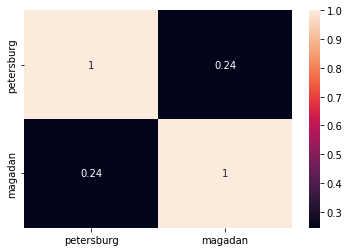

In [32]:
import seaborn as sns

sns.heatmap(data.corr(), annot = True)

Гипотеза - нет связи между данными подтверждается, так как при расчете корреляции мы получили значение 0.24 - отсутствие связи или очень слабая вязь.

Наудем разницу в среднем размере мидии в зависимости от города-производителя.

In [20]:
mean_petersburg = data['petersburg'].mean()
mean_magadan    = data['magadan'].mean()

print(f"Средний размер мидии в Петербурге: {mean_petersburg}")
print(f"Средний размер мидии в Магадане: {mean_magadan}")
print("Разница средних размеров в разных городах равна:",
        mean_petersburg - mean_magadan)

Средний размер мидии в Петербурге: 0.10344285714285714
Средний размер мидии в Магадане: 0.0780125
Разница средних размеров в разных городах равна: 0.025430357142857143


Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

In [21]:
from scipy.stats import f_oneway

In [22]:
_, p = f_oneway(petersburg, magadan)

In [25]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в Петербурге и Магадане.'
Ha = 'Есть значимая разница между средним размером раковины мидий в Петербурге и Магадане.'
alpha = 0.01

In [31]:
if p>alpha:
  print(f"Вывод: \n {p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. \n {H0}")
else:
  print(f"Вывод: \n {p} <= {alpha}. Мы отвергаем нулевую гипотезу. \n {Ha}")

Вывод: 
 0.004940324868384318 <= 0.01. Мы отвергаем нулевую гипотезу. 
 Есть значимая разница между средним размером раковины мидий в Петербурге и Магадане.
